# Spectral Fly Fishing
## Thomas Cycyota

### Notebook 0: Image Scraping and Pre-processing
Downloading and processing images to return matrix of image and pixel values

In [2]:
from bs4 import BeautifulSoup
import urllib.request
import requests
from PIL import Image
import scipy
import numpy as np
import time
import matplotlib.pyplot as plt

In [125]:
folder_prefix = "final_data/"

## Step 1: Get IDs of all images from listing page

In [4]:
fly_ids = []
total_pages = 100
url_base = "https://www.orvis.com/fly-fishing-flies?page="

for page_no in range(total_pages):
    #Concat to full URL
    url_full = url_base+str(page_no)
    
    print("Getting content from: ",url_full)
    page = requests.get(url_full)
    soup = BeautifulSoup(page.text, 'html.parser')
    images = soup.body.find_all("img")
    for image in images:
        path = image["src"].split("/")
        if path[1] == "secure_assets" and path[2] == "thumbnails":
            fly_ids.append(path[3])
        
    time.sleep(2)

Getting content from:  https://www.orvis.com/fly-fishing-flies?page=0
Getting content from:  https://www.orvis.com/fly-fishing-flies?page=1
Getting content from:  https://www.orvis.com/fly-fishing-flies?page=2
Getting content from:  https://www.orvis.com/fly-fishing-flies?page=3
Getting content from:  https://www.orvis.com/fly-fishing-flies?page=4
Getting content from:  https://www.orvis.com/fly-fishing-flies?page=5
Getting content from:  https://www.orvis.com/fly-fishing-flies?page=6
Getting content from:  https://www.orvis.com/fly-fishing-flies?page=7
Getting content from:  https://www.orvis.com/fly-fishing-flies?page=8
Getting content from:  https://www.orvis.com/fly-fishing-flies?page=9
Getting content from:  https://www.orvis.com/fly-fishing-flies?page=10
Getting content from:  https://www.orvis.com/fly-fishing-flies?page=11
Getting content from:  https://www.orvis.com/fly-fishing-flies?page=12
Getting content from:  https://www.orvis.com/fly-fishing-flies?page=13
Getting content 

In [7]:
with open(folder_prefix+"fly_ids.txt", "w") as text_file:
    print(fly_ids, file=text_file)

In [13]:
len(fly_ids)

478

## Step 2: Download all images to local file

In [9]:
assets_url = "https://www.orvis.com/secure_assets/prodimg/"
save_path = folder_prefix
for fly_id in fly_ids:
    urllib.request.urlretrieve(assets_url+fly_id, save_path+fly_id)
#     print("Got image: ", fly_id)
    time.sleep(2)

## Step 3: Resize image to standard pixel size

In [ ]:
# image_grey = Image.open("images/03782Wgrey.jpg").convert('L')
# image_rgb  = Image.open("images/03782Wgrey.jpg")

# #After research and testing, the LANCZOS algorithm was chosen to compress
# #images as it maintains quality and accurately compresses sampled images
# compres_grey = image_grey.resize((64,64),Image.LANCZOS)
# compres_rgb  = image_rgb.resize((64,64),Image.LANCZOS)

# #After research and testing, these settings were picked to preserve
# #Optimal image quality while also reducing file sizes
# compres_rgb.save("image_scaled_opt2.jpg", quality=95, optimize=True)

# np_im = np.array(compres_rgb)
# np_im.shape

In [ ]:
# plt.imshow(np_im)

## Step 4: Append to array

In [10]:
size_rgb = 64*64*3
size_grey = 64*64
result_rgb = np.empty((0, size_rgb))
result_grey = np.empty((0, size_grey))
for fly in fly_ids:
    #Process RGB Images
    image_rgb  = Image.open(folder_prefix+fly)
    compres_rgb  = image_rgb.resize((64,64),Image.LANCZOS)
    np_rgb = np.array(compres_rgb)
    flat_rgb = np_rgb.flatten()
    result_rgb = np.append(result_rgb, [flat_rgb], axis=0)
    
    #Process Greyscale Images
    image_grey = Image.open(folder_prefix+fly).convert('L') 
    compres_grey = image_grey.resize((64,64),Image.LANCZOS)
    np_grey = np.array(compres_grey)
    flat_grey = np_grey.flatten()
    result_grey = np.append(result_grey, [flat_grey], axis=0)
    
    

In [91]:
fly_ids[120]

'0403NW.jpg'

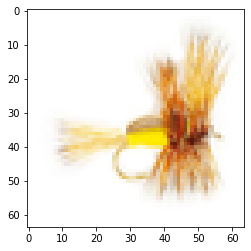

In [89]:
image_rgb = result_rgb[120,:]
plot_rgb = np.reshape(image_rgb, (64,64,3)).astype('uint8')
plt.imshow(plot_rgb);

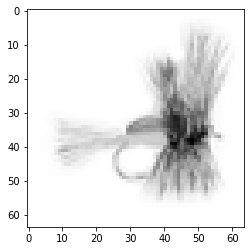

In [90]:
image_grey = result_grey[120,:]
plot_grey = np.reshape(image_grey, (64,64)).astype('uint8')
plot_grey.shape
plt.imshow(plot_grey,cmap='gray');

In [11]:
np.savetxt(folder_prefix+"images_rgb.txt", result_rgb, fmt='%i', delimiter=',')

In [12]:
np.savetxt(folder_prefix+"images_grey.txt", result_grey, fmt='%i', delimiter=',')

## Step 5: Removing non-fly images

In [119]:
#Manually-created list of images to remove because they are not flies
remove = ["2ZSS109W_.jpg", "26RE20VFbox.jpg", "79X6a.jpg", "79YAs.jpg", "79YEa.jpg", "79YG0.jpg", "79YHa.jpg", "79YRa.jpg", "89RE.jpg", "89RHa.jpg", "97K0.jpg", "97K1a.jpg", "97K2a.jpg", "97K5a.jpg", "97K6a.jpg", "97K7a.jpg", "97K8a.jpg", "97KTa.jpg", "97KXa.jpg" ]


In [117]:
len(remove)
# len(fly_ids)

19

In [113]:
fly_ids_final = fly_ids.copy()
for r in remove:
    print("Removing:", r)
    fly_ids_final.remove(r)

Removing: 2ZSS109W_.jpg
Removing: 26RE20VFbox.jpg
Removing: 79X6a.jpg
Removing: 79YAs.jpg
Removing: 79YEa.jpg
Removing: 79YG0.jpg
Removing: 79YHa.jpg
Removing: 79YRa.jpg
Removing: 89RE.jpg
Removing: 89RHa.jpg
Removing: 97K0.jpg
Removing: 97K1a.jpg
Removing: 97K2a.jpg
Removing: 97K5a.jpg
Removing: 97K6a.jpg
Removing: 97K7a.jpg
Removing: 97K8a.jpg
Removing: 97KTa.jpg
Removing: 97KXa.jpg


In [120]:
assert len(fly_ids_final) == (478-19)

In [121]:
size_rgb = 64*64*3
size_grey = 64*64
result_rgb = np.empty((0, size_rgb))
result_grey = np.empty((0, size_grey))
for fly in fly_ids_final:
    #Process RGB Images
    image_rgb  = Image.open(folder_prefix+fly)
    compres_rgb  = image_rgb.resize((64,64),Image.LANCZOS)
    np_rgb = np.array(compres_rgb)
    flat_rgb = np_rgb.flatten()
    result_rgb = np.append(result_rgb, [flat_rgb], axis=0)
    
    #Process Greyscale Images
    image_grey = Image.open(folder_prefix+fly).convert('L') 
    compres_grey = image_grey.resize((64,64),Image.LANCZOS)
    np_grey = np.array(compres_grey)
    flat_grey = np_grey.flatten()
    result_grey = np.append(result_grey, [flat_grey], axis=0)
    

In [126]:
with open(folder_prefix+"fly_ids_final.txt", "w") as text_file:
    print(fly_ids_final, file=text_file)

In [122]:
np.savetxt(folder_prefix+"images_rgb_final.txt", result_rgb, fmt='%i', delimiter=',')


In [123]:
np.savetxt(folder_prefix+"images_grey_final.txt", result_grey, fmt='%i', delimiter=',')
